# Polynomial Regression

In [1]:
# We would need these libraries to manage our dataset
# Numpy: used for large, multi-dimensional arrays and matrices, and for high-level mathematical functions
# Pandas: used for data manipulation and analysis
# matplotlib: used for visualisation and plotting graph/image/etc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the iris dataset from sklearn
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn.datasets import load_iris
# load the dataset
iris = load_iris()
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# reshape the X so it is a 2D array, which sklearn model usually expect
X = iris['data'][:,0].reshape(-1, 1) # 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
y = iris['data'][:,3] # petal width (cm)
X.shape

(150, 1)

To do polynomial regression, we are gonna transform our dataset to give it polynomial features. We can choose which degree of polynome we want. 

In [4]:
# Import the PolynomialFeatures from sklearn to change the data
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
X_.shape

(150, 3)

We can observe the first row of data is now equal to [x⁰, x, x²]

In [6]:
X[0], X_[0]

(array([5.1]), array([ 1.  ,  5.1 , 26.01]))

To do polynomial regression, we will just use the normal regression provided by scikit-learn

In [7]:
# import regression from sklearn
from sklearn.linear_model import LinearRegression
# fit/train the model using the data
reg = LinearRegression()
reg.fit(X_, y)

LinearRegression()

Instead of being an equation including multiple feature, this one is only dependent of x

In [8]:
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹") # used to create subscript so it's pretty
print('score (r square):', reg.score(X_, y))
print('coef:', reg.coef_)
print('intercept:', reg.intercept_)
print('equation: y = ' + ' + '.join([f'{reg.coef_[i]:.2f}x{str(i).translate(SUP)}' for i in range(len(reg.coef_))]) + f' + {reg.intercept_:.2f}')

score (r square): 0.700599606382408
coef: [ 0.          2.80601494 -0.17189424]
intercept: -9.210815856143169
equation: y = 0.00x⁰ + 2.81x¹ + -0.17x² + -9.21


In [12]:
plt_x = np.linspace(X[:,0].min(), X[:,0].max(), 30).reshape(-1,1)
plt_x_squared= poly.fit_transform(plt_x)
y_pred = reg.predict(plt_x_squared)

In [13]:
y_equa = np.array([reg.coef_[i] * (plt_x[:, 0]**i) for i in range(len(reg.coef_))]).sum(0) + reg.intercept_

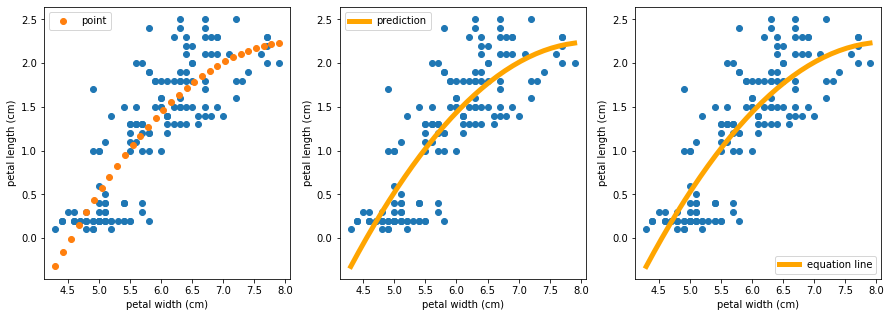

In [14]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    axs[i].scatter(X, y)
    axs[i].set_xlabel(iris['feature_names'][3])
    axs[i].set_ylabel(iris['feature_names'][2])
axs[0].scatter(plt_x, y_pred, label='point')
axs[1].plot(plt_x, y_pred, color='orange', linewidth=5, label='prediction')
axs[2].plot(plt_x, y_equa, color='orange', linewidth=5, label='equation line')
for i in range(3):
    axs[i].legend()

## Cubic?

we want to have more feature in our data

In [36]:
poly3 = PolynomialFeatures(degree=3)
X_3 = poly3.fit_transform(X)
X_3.shape

(150, 4)

Now our data has the format: [x⁰, x¹, x², x³]

In [28]:
X[0], X_3[0]

(array([5.1]), array([  1.   ,   5.1  ,  26.01 , 132.651]))

In [29]:
reg3 = LinearRegression()
reg3.fit(X_3, y)

LinearRegression()

In [30]:
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹") # used to create subscript so it's pretty
print('score (r square):', reg3.score(X_3, y))
print('coef:', reg3.coef_)
print('intercept:', reg3.intercept_)
print('equation: y = ' + ' + '.join([f'{reg3.coef_[i]:.2f}x{str(i).translate(SUP)}' for i in range(len(reg3.coef_))]) + f' + {reg3.intercept_:.2f}')

score (r square): 0.7157064239375199
coef: [  0.         -10.67156954   2.08179174  -0.12376391]
intercept: 17.24964842680484
equation: y = 0.00x⁰ + -10.67x¹ + 2.08x² + -0.12x³ + 17.25


In [31]:
plt_x = np.linspace(X[:,0].min(), X[:,0].max(), 300).reshape(-1,1)
plt_x_squared= poly3.fit_transform(plt_x)
y_pred = reg3.predict(plt_x_squared)
y_equa = np.array([reg3.coef_[i] * (plt_x[:, 0]**i) for i in range(len(reg3.coef_))]).sum(0) + reg3.intercept_

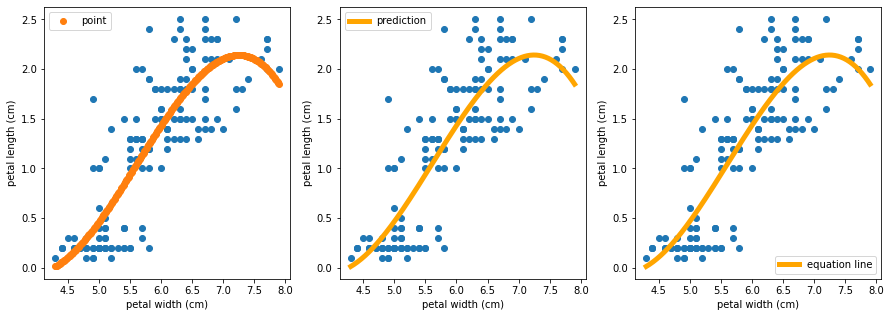

In [32]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    axs[i].scatter(X, y)
    axs[i].set_xlabel(iris['feature_names'][3])
    axs[i].set_ylabel(iris['feature_names'][2])
axs[0].scatter(plt_x, y_pred, label='point')
axs[1].plot(plt_x, y_pred, color='orange', linewidth=5, label='prediction')
axs[2].plot(plt_x, y_equa, color='orange', linewidth=5, label='equation line')
for i in range(3):
    axs[i].legend()

In [17]:
reg1 = LinearRegression()
reg1.fit(X, y)

LinearRegression()

In [18]:
k = 1
n = len(X)
sigma = (1/n) * sum((y - reg1.predict(X)) ** 2)
rssn = 1/n * ((y - reg1.predict(X))**2).sum()
rssn, sigma, np.log(sigma)

(0.1910150076942736, 0.1910150076942736, -1.6554032797067384)

In [19]:
bic = n*np.log(sigma) + k*np.log(n)
print("BIC", bic)

BIC -243.2998566619145


In [20]:
k = 2
n = len(X_)
sigma = (1/n) * sum((y - reg.predict(X_)) ** 2)
rssn = 1/n * ((y - reg.predict(X_))**2).sum()
rssn, sigma, np.log(sigma)

(0.17279381410299127, 0.17279381410299116, -1.7556562212680435)

In [21]:
bic = n*np.log(sigma) + k*np.log(n)
print("BIC", bic)

BIC -253.32716260201403


In [68]:
k = 3
n = len(X_3)
sigma = (1/n) * sum((y - reg3.predict(X_3)) ** 2)
rssn = 1/n * ((y - reg3.predict(X_3))**2).sum()
rssn, sigma, np.log(sigma)

(0.16407517284549217, 0.16407517284549214, -1.8074305851687404)

In [69]:
bic = n*np.log(sigma) + k*np.log(n)
print("BIC", bic, k*np.log(n) - 2*np.log(mean_squared_error(y, reg3.predict(X_3))))

BIC -256.0826818930223 18.64676705262625


In [72]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
model = sm.OLS(y, X).fit()
k = 3
n = len(X)
sigma = sum((y - model.predict(X)) ** 2) / n
rssn = ((y - model.predict(X))**2).sum() / n
rssn, sigma, mean_squared_error(y, model.predict(X))

(0.3913163801921316, 0.3913163801921318, 0.3913163801921316)

In [73]:
bic = n*np.log(sigma) + k*np.log(n)
print("BIC", bic, model.bic)

BIC -125.70392757057981 289.9563618026294


In [74]:
def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic

In [75]:
from math import log
calculate_bic(n, sigma, k)

-125.70392757057981